In [51]:
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")

## Loading the data

In [52]:
bank_additional_full = pd.read_csv('bank-additional-full.csv', delimiter=";")
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [54]:
num_features = bank_additional_full.select_dtypes(exclude='object').columns.values
cat_features = bank_additional_full.select_dtypes(include='object').columns.values
print(f"Number of numerical features: {len(num_features)}")
print(f"Number of categorical features: {len(cat_features)}")

Number of numerical features: 10
Number of categorical features: 11


## Dealing with numerical features: Yash Doshi & Anuj Singh

In [55]:
# Making a copy of the dataframe
df_copy1 = bank_additional_full.copy()

### 1. Checking correlation between features

In [56]:
#Label encoding target variable ('y') to include it in correlation matrix
df_copy1['y'].replace({'no':0, 'yes':1},inplace=True)

<AxesSubplot: >

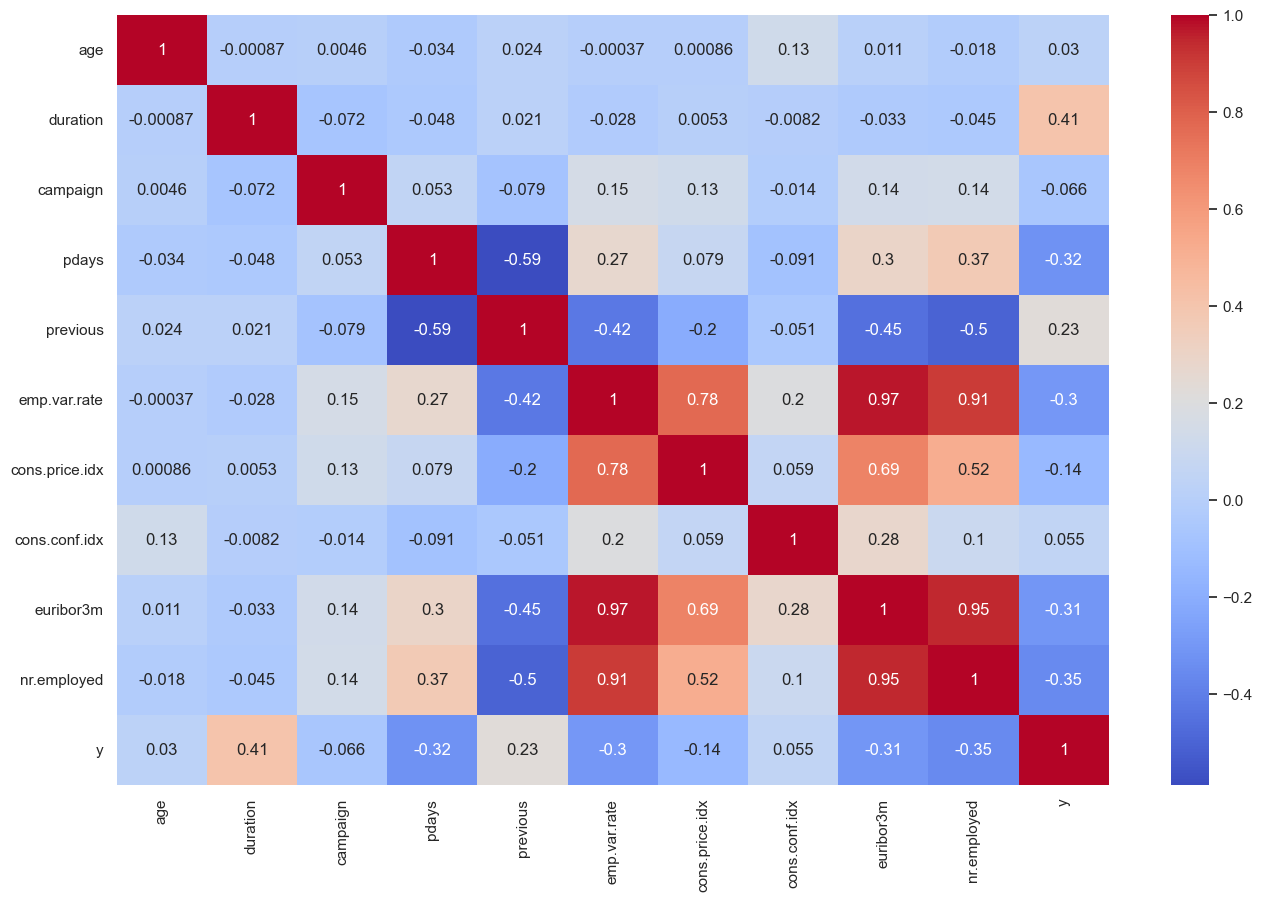

In [57]:
# Making correlation matrix and heatmap
corr_matrix = df_copy1.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

Observations:
- euribor3m, emp.var.rate, and nr. employed are heavily correlated with each other. These can be reduced to one feature.

### 2. Checking distributions for each feature

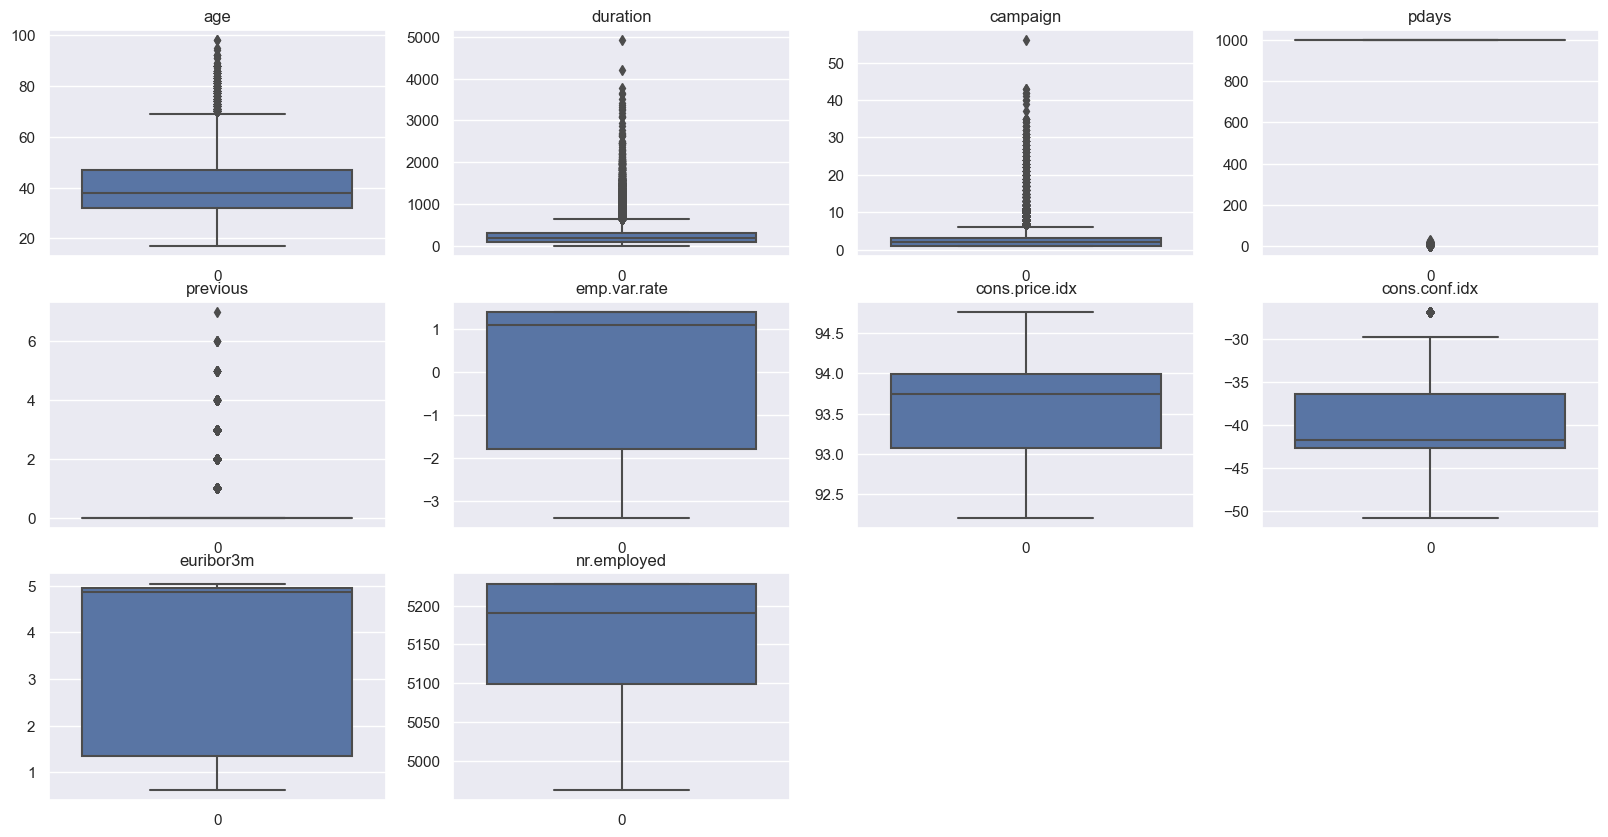

In [58]:
# Plotting boxplots for each numerical feature
fig = plt.figure(figsize=(20,10))
c=1
for feature in num_features:
    fig.add_subplot(3,4,c).set_title(feature)
    sns.boxplot(bank_additional_full[feature])
    c+=1

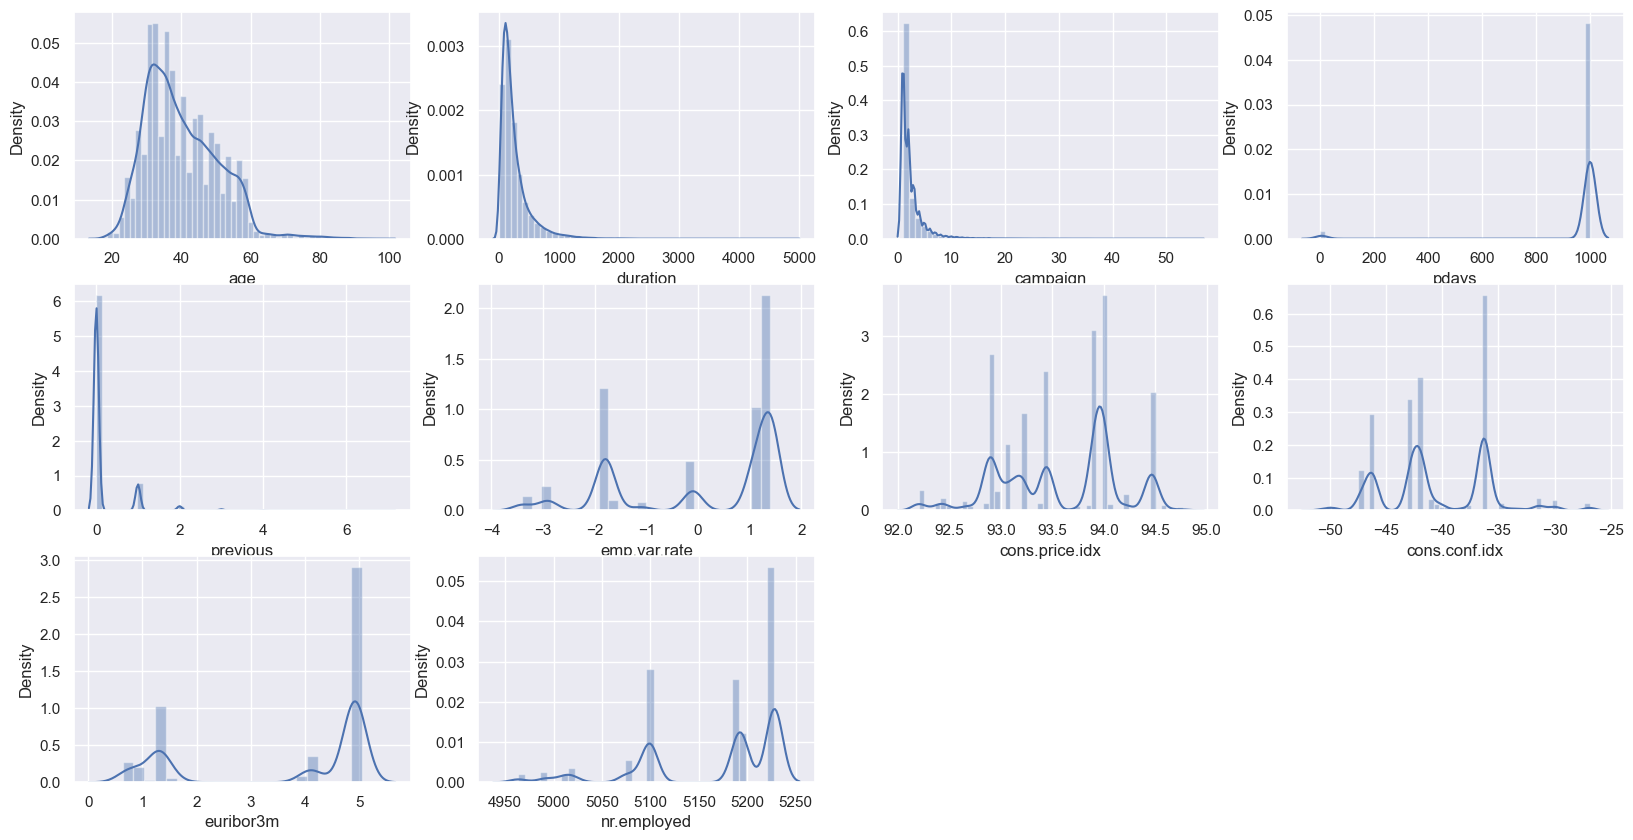

In [59]:
# Plotting distribution of each feature
fig = plt.figure(figsize=(20,10))
c=1
for feature in num_features:
    fig.add_subplot(3,4,c)
    sns.distplot(bank_additional_full[feature])
    c+=1

### Tasks to be performed:

1. Outliers in duration, campaign and pdays will be dealt with
2. Dimensionality reduction will be applied on euribor3m, emp.var.rate, and nr. employed

### 1. Handling outliers: Anuj Singh

In [60]:
#Dropping values above 95 percentile in duration and campaign
duration_q95 = df_copy1['duration'].quantile(0.95)
campaign_q95 = df_copy1['campaign'].quantile(0.95)
# filter out values above the 95th percentile range
df_copy1 = df_copy1.loc[(df_copy1['duration'] <= duration_q95) & (df_copy1['campaign'] <= campaign_q95)]

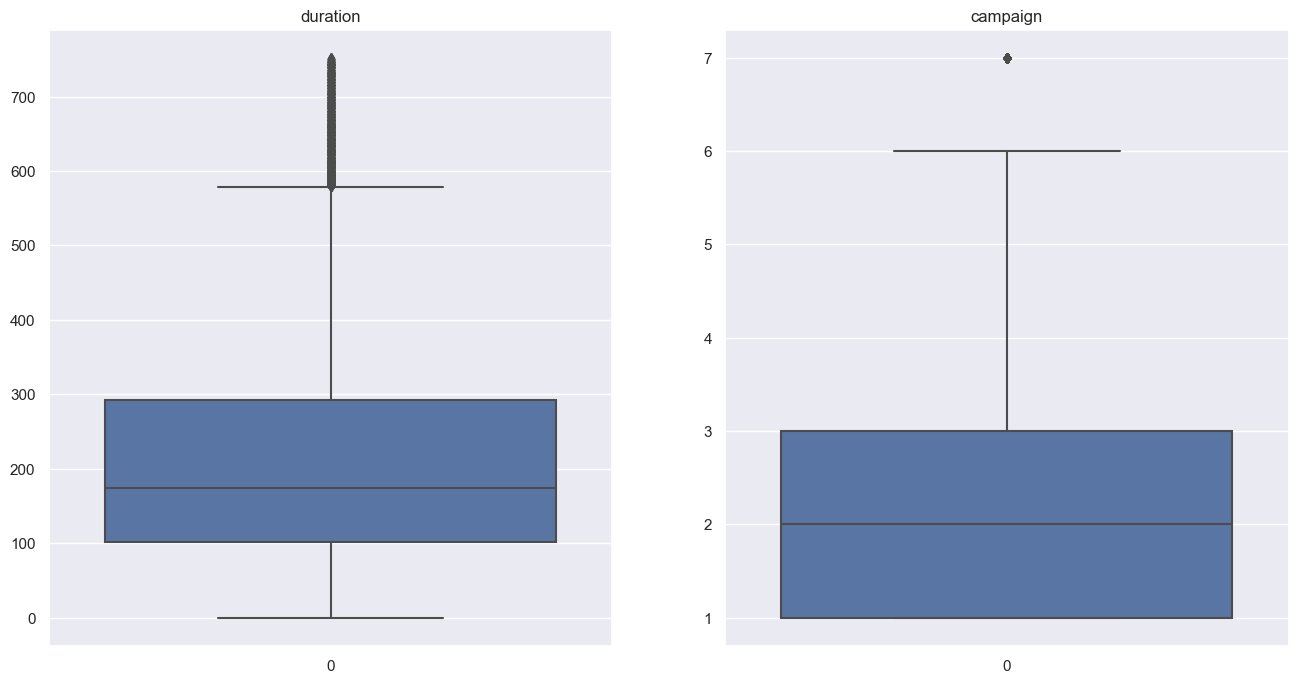

In [61]:
# Plotting boxplots for duration and campaign
fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,2,1).set_title('duration')
sns.boxplot(df_copy1['duration'])
fig.add_subplot(1,2,2).set_title('campaign')
sns.boxplot(df_copy1['campaign'])

plt.savefig('duration_campaign_boxplot.png')

In [62]:
df_copy1['pdays'].value_counts()

999    36010
3        416
6        385
4        111
9         58
7         55
2         55
12        54
10        47
5         42
13        32
11        25
1         25
15        23
14        18
8         16
0         15
16        11
17         8
18         6
22         3
21         2
19         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [49]:
#Removing pdays column since too many features have missing data: 999
df_copy1.drop(['pdays'],axis=1,inplace=True)
df_copy1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,93.994,-36.4,0,-0.979407
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,93.994,-36.4,0,-0.979407
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,93.994,-36.4,0,-0.979407
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,93.994,-36.4,0,-0.979407
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,93.994,-36.4,0,-0.979407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,94.767,-50.8,1,2.915219
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,94.767,-50.8,0,2.915219
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,94.767,-50.8,0,2.915219
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,94.767,-50.8,1,2.915219


### 2. Dimensionality Reduction of highly collinear features: Yash Doshi

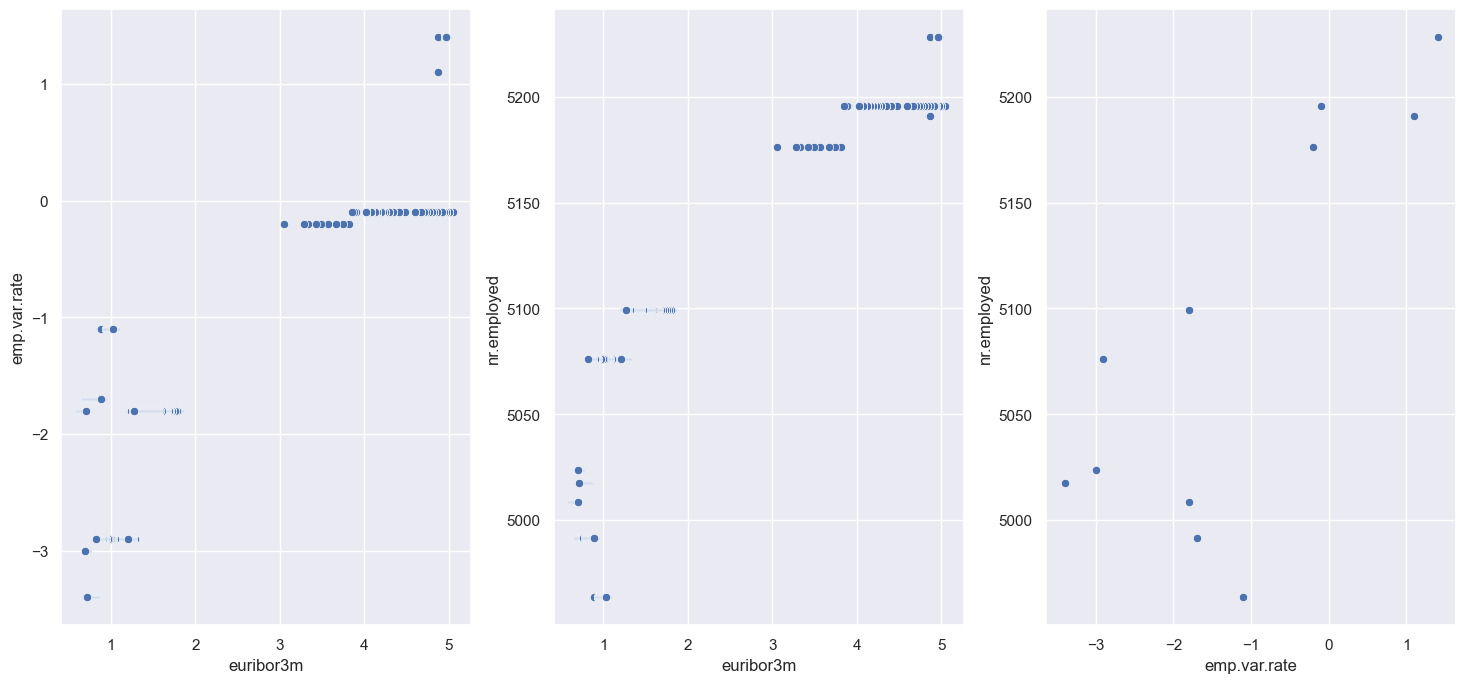

In [11]:
# Checking the type of relationship between the features
import itertools # To get pairwise combinations

high_corr_features = ['euribor3m', 'emp.var.rate', 'nr.employed']
pairs = list(itertools.combinations(high_corr_features,2))

fig = plt.figure(figsize=(18,8))
for index, pair in enumerate(pairs):
    fig.add_subplot(1,3,index+1)
    sns.scatterplot(data=df_copy1,x=pair[0],y=pair[1])

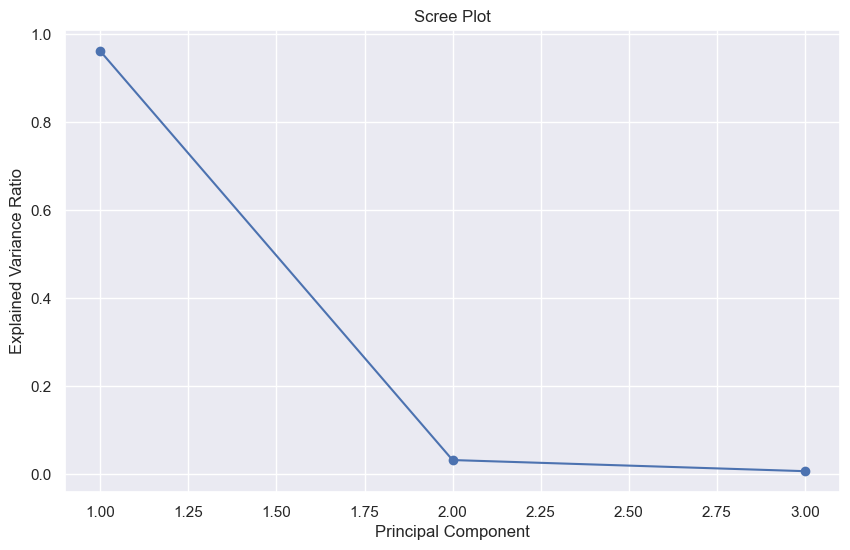

In [12]:
# Using PCA to reduce these features into one or two features, hence reducing multi-collinearity
from sklearn.decomposition import PCA

# Standardizing the values in the features
df_subset = df_copy1[high_corr_features]
df_subset = (df_subset - df_subset.mean()) / df_subset.std()

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(df_subset)

# Get explained variance ratio
variance = pca.explained_variance_ratio_

# Plot scree plot
fig = plt.figure(figsize=(10,6))
fig.add_subplot(1,1,1)
plt.plot(range(1, len(variance) + 1), variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

plt.savefig('screeplot_week9.png')

In [13]:
# Transforming the features to one principle component
# Standardizing the values in the features
df_subset = df_copy1[high_corr_features]
df_subset = (df_subset - df_subset.mean()) / df_subset.std()

# Perform PCA with 3 components
pca = PCA(n_components=1)
df_pca = pd.DataFrame(columns=['PC1'],data=pca.fit_transform(df_subset))

#Updating the dataframe
df_copy1.drop(high_corr_features,axis=1, inplace=True)
df_copy1 = pd.concat([df_copy1,df_pca],axis=1)

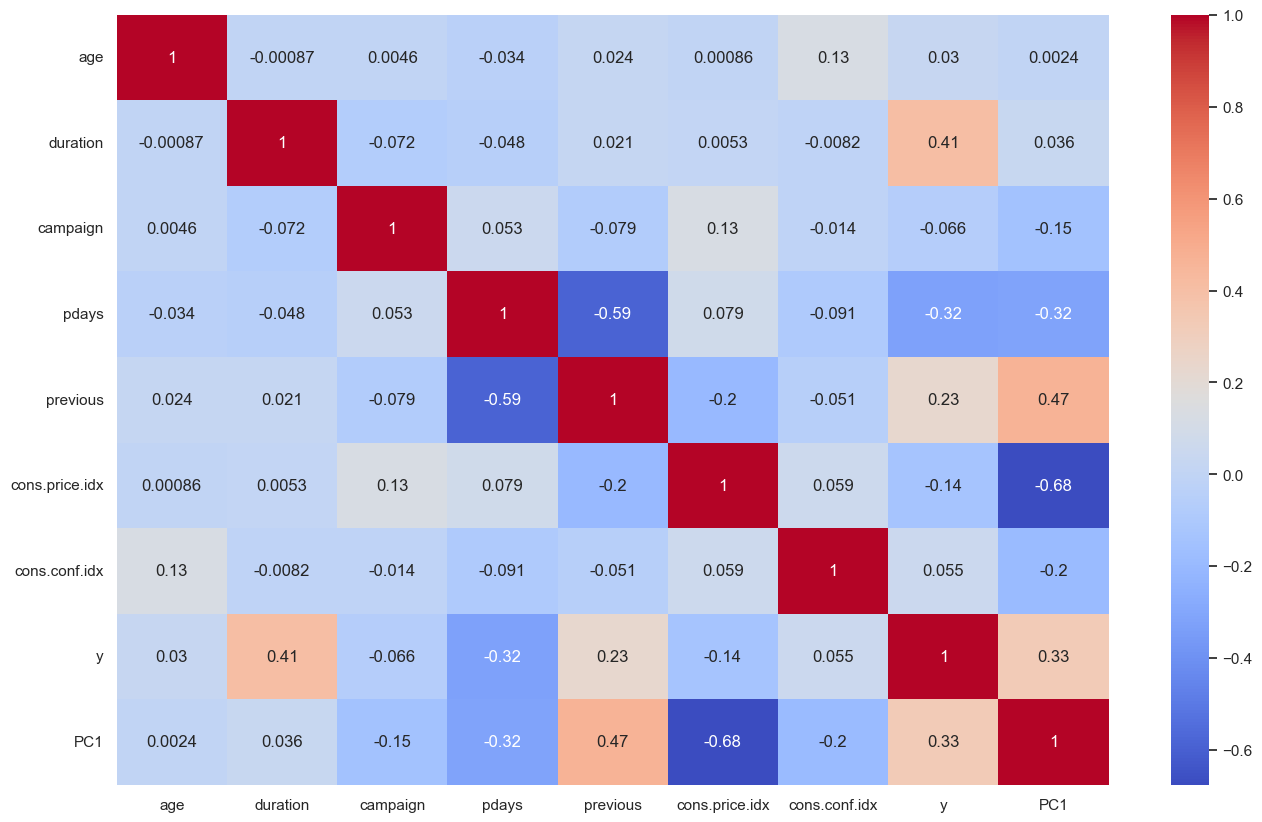

In [14]:
# Checking correlation matrix for updated dataframe
# Making correlation matrix and heatmap
corr_matrix = df_copy1.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

plt.savefig('updated_df_heatmap_week9.png')

## Dealing with categorical features: Yash Jadwani & Harold Wilson

### Checking for unknown values

In [15]:
for cat_feature in cat_features:
    if "unknown" in bank_additional_full[cat_feature].value_counts():
        print(f'count of unknown in {cat_feature}: {bank_additional_full[cat_feature].value_counts()["unknown"]}')
        print(f'% of unknown in {cat_feature}: {(bank_additional_full[cat_feature].value_counts()["unknown"]/bank_additional_full.shape[0])*100:.3f}%')
        print("-----------------------------------------------------------------")

count of unknown in job: 330
% of unknown in job: 0.801%
-----------------------------------------------------------------
count of unknown in marital: 80
% of unknown in marital: 0.194%
-----------------------------------------------------------------
count of unknown in education: 1731
% of unknown in education: 4.203%
-----------------------------------------------------------------
count of unknown in default: 8597
% of unknown in default: 20.873%
-----------------------------------------------------------------
count of unknown in housing: 990
% of unknown in housing: 2.404%
-----------------------------------------------------------------
count of unknown in loan: 990
% of unknown in loan: 2.404%
-----------------------------------------------------------------


In [11]:
## Making a copy of a dataset for replacing N/A or unknown 
bank_additional_data = bank_additional_full.copy()

In [12]:
## Replacing unknown in feature with null
bank_additional_data.replace('unknown', np.nan, inplace=True)

In [13]:
## Deleting duplicate entries
print('Duplicate entries in the dataset :',bank_additional_data.duplicated().sum())
bank_additional_data.drop_duplicates(inplace=True)
print('Duplicate entries in the dataset After Deletion :',bank_additional_data.duplicated().sum())


Duplicate entries in the dataset : 12
Duplicate entries in the dataset After Deletion : 0


In [14]:
bank_additional_data.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [15]:
bank_additional_data[(bank_additional_data.job.isnull()) & (bank_additional_data.default.isnull()) & (bank_additional_data.housing.isnull())]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1915,44,NaN,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2723,45,NaN,married,NaN,NaN,NaN,NaN,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
21556,44,NaN,married,NaN,NaN,NaN,NaN,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [16]:
## Removing all the rows where Job, Default and Housing are null

bank_additional_data = bank_additional_data.drop(bank_additional_data[(bank_additional_data.job.isnull()) & (bank_additional_data.default.isnull()) & (bank_additional_data.housing.isnull())].index)
bank_additional_data[(bank_additional_data.job.isnull()) & (bank_additional_data.default.isnull()) & (bank_additional_data.housing.isnull())]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [17]:
bank_additional_data[(bank_additional_data.job.isnull()) & (bank_additional_data.education.isnull())]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
73,57,NaN,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
299,38,NaN,married,NaN,NaN,no,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
303,43,NaN,married,NaN,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
343,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40289,76,NaN,married,NaN,no,no,no,telephone,jul,thu,...,3,999,0,nonexistent,-1.7,94.215,-40.3,0.899,4991.6,yes
40370,59,NaN,married,NaN,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,NaN,married,NaN,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,NaN,divorced,NaN,NaN,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes


In [18]:
## Removing all the rows where Job, Education are null.
bank_additional_data = bank_additional_data.drop(bank_additional_data[(bank_additional_data.job.isnull()) & (bank_additional_data.education.isnull())].index)
bank_additional_data[(bank_additional_data.job.isnull()) & (bank_additional_data.education.isnull())]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


### Imputation in Marital Status

In [19]:
bank_additional_data[bank_additional_data.marital.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,NaN,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,NaN,university.degree,NaN,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,NaN,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,NaN,high.school,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,NaN,NaN,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,NaN,university.degree,no,no,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,NaN,university.degree,no,yes,no,telephone,oct,thu,...,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,...,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,...,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [20]:
### Impuation of marital status based on age by creating age marital map

age_marital_map = bank_additional_data.groupby('age')['marital'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).to_dict()
bank_additional_data['marital'] = bank_additional_data.apply(lambda row: age_marital_map.get(row['age']) if pd.isna(row['marital']) else row['marital'], axis=1)


bank_additional_data.marital.isnull().sum()

0

### Imputation in jobs

In [21]:
bank_additional_data[bank_additional_data.job.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35,55,NaN,married,basic.4y,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,NaN,divorced,high.school,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
794,28,NaN,single,basic.9y,NaN,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
878,28,NaN,single,basic.9y,NaN,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
885,43,NaN,married,high.school,NaN,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40058,57,NaN,married,basic.4y,no,yes,no,cellular,jul,wed,...,3,999,0,nonexistent,-1.7,94.215,-40.3,0.802,4991.6,no
40208,54,NaN,married,basic.9y,no,yes,no,cellular,jul,tue,...,2,13,2,success,-1.7,94.215,-40.3,0.876,4991.6,no
40240,42,NaN,single,university.degree,no,no,no,cellular,jul,fri,...,6,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,yes
40244,42,NaN,single,university.degree,no,yes,no,cellular,jul,fri,...,1,999,2,failure,-1.7,94.215,-40.3,0.885,4991.6,yes


In [22]:
### Impuation of Job based on age and education by creating age,education, and job map
age_edu_job_map = bank_additional_data.groupby(['age', 'education'])['job'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).to_dict()
bank_additional_data['job'] = bank_additional_data.apply(lambda row: age_edu_job_map.get((row['age'], row['education'])) if pd.isna(row['job']) else row['job'], axis=1)

bank_additional_data.job.isnull().sum()

0

### Imputation in Education

In [23]:
bank_additional_data[bank_additional_data.education.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,NaN,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,NaN,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,NaN,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,NaN,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [24]:
### Impuation of Education based on Job by creating education and job map

job_education_map = bank_additional_data.groupby(['job'])['education'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).to_dict()
bank_additional_data['education'] = bank_additional_data.apply(lambda row: job_education_map.get((row['job'])) if pd.isna(row['education']) else row['education'], axis=1)

bank_additional_data.education.isnull().sum()

0

### Imputation of Default, Housing and Loan

In [25]:
bank_additional_data[(bank_additional_data.loan.isnull()) & (bank_additional_data.default.isnull()) & (bank_additional_data.housing.isnull())]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
81,51,blue-collar,married,basic.4y,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
470,42,technician,single,professional.course,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
494,32,admin.,single,university.degree,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34618,33,blue-collar,married,basic.9y,NaN,NaN,NaN,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
34826,59,management,married,basic.4y,NaN,NaN,NaN,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
34970,42,self-employed,married,professional.course,NaN,NaN,NaN,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
37661,71,retired,married,basic.4y,NaN,NaN,NaN,cellular,aug,tue,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.859,5076.2,yes


In [26]:
bank_additional_data = bank_additional_data.drop(bank_additional_data[(bank_additional_data.loan.isnull()) & (bank_additional_data.default.isnull()) & (bank_additional_data.housing.isnull())].index)
bank_additional_data[(bank_additional_data.loan.isnull()) & (bank_additional_data.default.isnull()) & (bank_additional_data.housing.isnull())]

## Removed all the rows where Loan, Housing,and defualt are null.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [27]:
bank_additional_data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8297
housing            763
loan               763
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

#### Default

In [28]:
bank_additional_data.default.value_counts()

no     32520
yes        3
Name: default, dtype: int64

The given dataset contains information on whether individuals have defaulted on their payments or not. After analyzing the data, it was found that out of the total 32523 records, only 3 individuals had defaulted. This suggests that the vast majority of individuals in the dataset have not defaulted on their payments. Therefore, we removed the default feature from the analysis as it may not be useful in making any meaningful conclusions.

In [29]:
## removing the defualt column
bank_additional_data.drop('default',axis=1,inplace=True)

#### Loan

In [30]:
print('Value count of loan before imputation:')
print(bank_additional_data.loan.value_counts())

Value count of loan before imputation:
no     33827
yes     6230
Name: loan, dtype: int64


In [31]:
## Impuation of loan based on Marital Status, Job and Education by creating loan, Marital Status, Job and Education map

loan_map = bank_additional_data.groupby(['marital','job','education'])['loan'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).to_dict()
bank_additional_data['loan'] = bank_additional_data.apply(lambda row: loan_map.get((row['marital'],row['job'],row['education'])) if pd.isna(row['loan']) else row['loan'], axis=1)

bank_additional_data.loan.isnull().sum()

0

In [32]:
print('Value count of loan after imputation:')
print(bank_additional_data.loan.value_counts())


Value count of loan after imputation:
no     34590
yes     6230
Name: loan, dtype: int64


#### Housing

In [33]:
print('Value count of housing before imputation:')
print(bank_additional_data.housing.value_counts())

Value count of housing before imputation:
yes    21495
no     18562
Name: housing, dtype: int64


In [34]:
## Impuation of housing based on Marital Status, Job and Education by creating housing, Marital Status, Job and Education map

housing_map = bank_additional_data.groupby(['marital','job','education'])['housing'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).to_dict()
bank_additional_data['housing'] = bank_additional_data.apply(lambda row: housing_map.get((row['marital'],row['job'],row['education'])) if pd.isna(row['housing']) else row['housing'], axis=1)

bank_additional_data.housing.isnull().sum()

0

In [35]:
print('Value count of housing after imputation:')
print(bank_additional_data.housing.value_counts())

Value count of housing after imputation:
yes    22195
no     18625
Name: housing, dtype: int64


In [36]:
bank_additional_data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [37]:
bank_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40820 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40820 non-null  int64  
 1   job             40820 non-null  object 
 2   marital         40820 non-null  object 
 3   education       40820 non-null  object 
 4   housing         40820 non-null  object 
 5   loan            40820 non-null  object 
 6   contact         40820 non-null  object 
 7   month           40820 non-null  object 
 8   day_of_week     40820 non-null  object 
 9   duration        40820 non-null  int64  
 10  campaign        40820 non-null  int64  
 11  pdays           40820 non-null  int64  
 12  previous        40820 non-null  int64  
 13  poutcome        40820 non-null  object 
 14  emp.var.rate    40820 non-null  float64
 15  cons.price.idx  40820 non-null  float64
 16  cons.conf.idx   40820 non-null  float64
 17  euribor3m       40820 non-null 

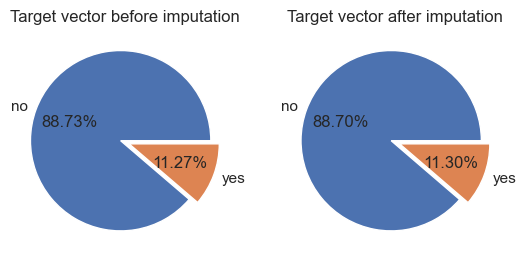

In [38]:
fig, axs = plt.subplots(1, 2)

axs[0].pie(bank_additional_full['y'].value_counts(),labels = bank_additional_full['y'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
axs[0].set_title('Target vector before imputation')

axs[1].pie(bank_additional_data['y'].value_counts(),labels = bank_additional_data['y'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
axs[1].set_title('Target vector after imputation')

plt.show()